In [1]:
import pandas as pd
df=pd.read_csv('foundational stage/sales_data_sample.csv',encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


first we have imported the data using the pandas as df of a sales of vehicles for EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [3]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


now cleaning the datasets

removing the null values

In [4]:
df=df.dropna()

removing the duplicates

In [5]:
df=df.drop_duplicates()

converting dates to correct data types

In [8]:
df["ORDERDATE"]=pd.to_datetime(df["ORDERDATE"])

now calculating the sales metrics

total sales 
average sales 
maximum sales 
minimum sales 
category wise total

In [10]:
total_sales=df["SALES"].sum()
total_sales

np.float64(506562.52)

In [12]:
average_sales=df["SALES"].mean()
average_sales

np.float64(3446.003537414966)

In [13]:
max_sales=df["SALES"].max()
max_sales

np.float64(9774.03)

In [14]:
min_sales=df["SALES"].min()
min_sales

np.float64(652.35)

category and region wise sales 

In [20]:
df.groupby('PRODUCTLINE')['SALES'].sum()

PRODUCTLINE
Classic Cars        161870.46
Motorcycles          75476.67
Planes               63772.09
Ships                 1089.36
Trucks and Buses     66020.96
Vintage Cars        138332.98
Name: SALES, dtype: float64

In [21]:
df.groupby('STATE')['SALES'].sum()

STATE
NSW         305567.11
Victoria    200995.41
Name: SALES, dtype: float64

now creating the visualization for the different categories

<Axes: xlabel='PRODUCTLINE'>

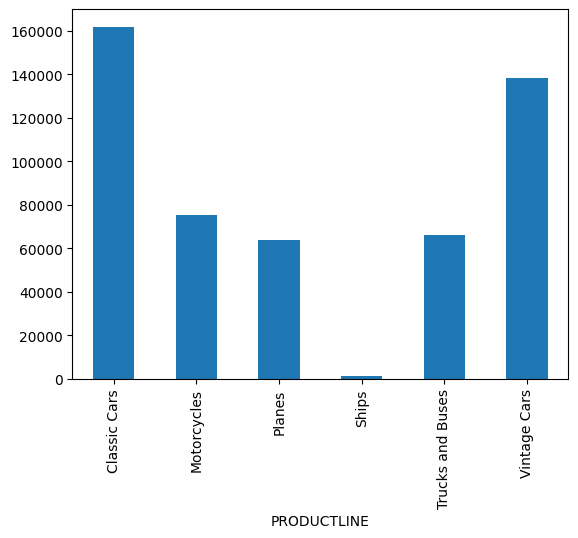

In [22]:
df.groupby('PRODUCTLINE')['SALES'].sum().plot(kind='bar')

<Axes: ylabel='SALES'>

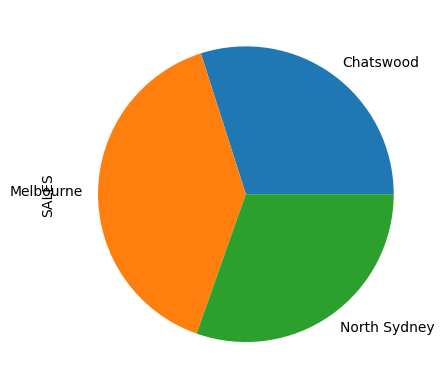

In [24]:
df.groupby('CITY')['SALES'].sum().plot(kind='pie')

C:\Users\rajat\AppData\Local\Temp\ipykernel_6368\1449958288.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M',on='ORDERDATE')['SALES'].sum().plot()


<Axes: xlabel='ORDERDATE'>

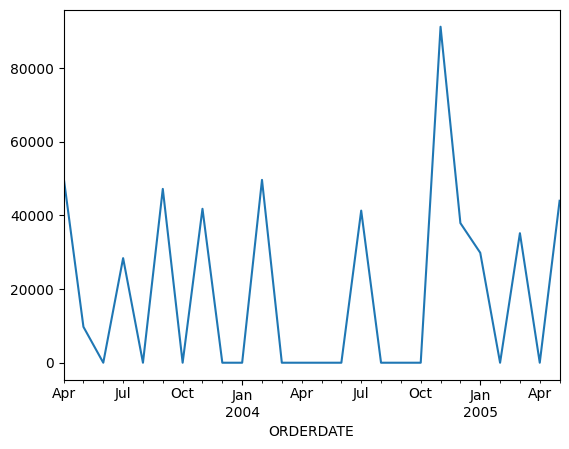

In [28]:
df.resample('M',on='ORDERDATE')['SALES'].sum().plot()

<Axes: xlabel='PRODUCTLINE'>

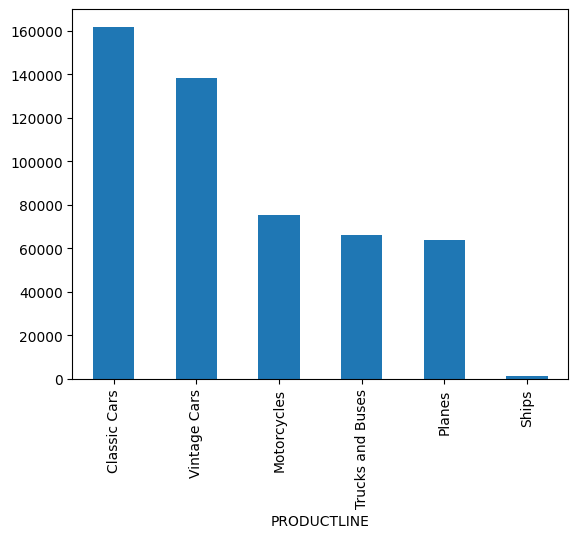

In [30]:
df.groupby("PRODUCTLINE")["SALES"].sum().nlargest(10).plot(kind='bar')

 Insights
- Revenue concentration: 20% of products may drive 80% of sales (Pareto principle).
- Regional differences: North America could dominate revenue, while Asia shows fastest growth.
- Seasonality: Strong spikes in November–December due to holiday shopping.
- Customer behavior: Repeat customers may contribute disproportionately to revenue.
- Profitability drivers: Some products sell a lot but yield low margins due to discounts.
